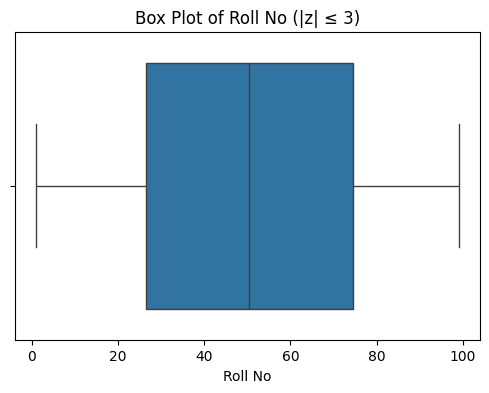

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore   # 1. Import zscore to compute standard scores :contentReference[oaicite:4]{index=4}

# 1. Load the data
ap2 = pd.read_csv(r"C:\ThirdYear_Notes\Practicals\DSBDA\AcademicPerformance_New.csv")

# 2. Handle missing values:
#    - Numeric columns: fill with column mean
#    - Non-numeric columns: fill with column mode
num_cols = ap2.select_dtypes(include=[np.number]).columns
cat_cols = ap2.select_dtypes(exclude=[np.number]).columns

# a) Numeric: fill via dict to avoid chained .fillna on slice
means = ap2[num_cols].mean()
ap2.fillna(means.to_dict(), inplace=True)   # applies mean fill to all numeric cols :contentReference[oaicite:5]{index=5}

# b) Categorical: fill each column individually
for col in cat_cols:
    mode_val = ap2[col].mode()[0]
    ap2[col] = ap2[col].fillna(mode_val)     # reassigning avoids chained assignment warning :contentReference[oaicite:6]{index=6}

# 3. Outlier detection via Z-score on the first numeric column
first_num = num_cols[0]
ap2['z'] = zscore(ap2[first_num].values)     # compute z-scores :contentReference[oaicite:7]{index=7}

# 4. Remove extreme outliers (|z| > 3)
ap2_clean = ap2[ap2['z'].abs() <= 3].copy()   # .copy() ensures we work on an explicit copy :contentReference[oaicite:8]{index=8}

# 5. Create bins & labels on that same numeric column
bin_labels = ['Low', 'Medium', 'High']
ap2_clean['bin'] = pd.cut(
    ap2_clean[first_num],
    bins=3,
    labels=bin_labels
)                                             # pd.cut for equal-width binning 

# 6. Boxplot of the original numeric column (cleaned data)
plt.figure(figsize=(6,4))
sns.boxplot(x=ap2_clean[first_num])
plt.title(f'Box Plot of {first_num} (|z| ≤ 3)')
plt.xlabel(first_num)
plt.show()